# **Automatidata project**
**Course 6 - The Nuts and bolts of machine learning**

You are a data professional in a data analytics firm called Automatidata. Their client, the New York City Taxi & Limousine Commission (New York City TLC), was impressed with the work you have done and has requested that you build a machine learning model to predict if a customer will not leave a tip. They want to use the model in an app that will alert taxi drivers to customers who are unlikely to tip, since drivers depend on tips.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 6 End-of-course project: Build a machine learning model

In this activity, you will practice using tree-based modeling techniques to predict on a binary target class.  
<br/>   

**The purpose** of this model is to find ways to generate more revenue for taxi cab drivers.  
  
**The goal** of this model is to predict whether or not a customer is a generous tipper.  
<br/>  

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# Build a machine learning model

<img src="https://drive.google.com/uc?id=1j4eZRrDDC_ayowY7oj2ymsRMphdE4Tuf" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="https://drive.google.com/uc?id=1xQC3f1RCcZxyVUbZ71T-e4HyRIJFF94C" width="100" height="100" align=left>


## PACE: Plan

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:

1.   What are you being asked to do?


2.   What are the ethical implications of the model? What are the consequences of your model making errors?
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a customer will give a tip, but they actually won't)?
  
  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a customer will not give a tip, but they actually will)?  
  
  
3.   Do the benefits of such a model outweigh the potential problems?
  
4.   Would you proceed with the request to build this model? Why or why not?

5.   Can the objective be modified to make it less problematic?



1.What are you being asked to do?
* To develop an app that enables TLC riders to estimate the taxi fares in advance of their ride.
* Creating a machine learning model (random forest or XGBoost) that can help predict whether or not a rider will be a generous tipper.

**Exemplar response:**

Predict if a customer will **not** leave a tip.

2.What are the ethical implications of the model? What are the consequences of your model making errors?
* What is the likely effect of the model when it predicts a false positive (i.e., when the model says a customer will give a tip, but they actually won't)?
    * False positives are worse for cab drivers, because they would pick up a customer expecting a good tip and then not receive one, frustrating the driver.
* What is the likely effect of the model when it predicts a false negative (i.e., when the model says a customer will not give a tip, but they actually will)?
    * False negatives are worse for customers, because a cab driver would likely pick up a different customer who was predicted to tip more—even when the original customer would have tipped generously.

**Exemplar response:**

Drivers who didn't receive tips will probably be upset that the app told them a customer would leave a tip. If it happened often, drivers might not trust the app.
Drivers are unlikely to pick up people who are predicted to not leave tips. Customers will have difficulty finding a taxi that will pick them up, and might get angry at the taxi company. Even when the model is correct, people who can't afford to tip will find it more difficult to get taxis, which limits the accessibility of taxi service to those who pay extra.

3.Do the benefits of such a model outweigh the potential problems?
* The risk of false negatives could result in customers who were not picked up refusing to use taxis in the future.

**Exemplar response:**

It's not good to disincentivize drivers from picking up customers. It could also cause a customer backlash. The problems seem to outweigh the benefits.

4.Would you proceed with the request to build this model? Why or why not?
* If the model is to predict whether or not a customer will tip, then it would be best not to proceed with building the model as it could result in taxis not picking up customers who would have tipped.

**Exemplar response:**

No. Effectively limiting equal access to taxis is ethically problematic, and carries a lot of risk.

5.Can the objective be modified to make it less problematic?
* Instead of predicting whether a customer will tip or not, have the model predict if a customer will tip generously.

**Exemplar response:**

We can build a model that predicts the most generous customers. This could accomplish the goal of helping taxi drivers increase their earnings from tips while preventing the wrongful exclusion of certain people from using taxis.

Suppose you were to modify the modeling objective so, instead of predicting people who won't tip at all, you predicted people who are particularly generous&mdash;those who will tip 20% or more? Consider the following questions:

1.  What features do you need to make this prediction?

2.  What would be the target variable?  

3.  What metric should you use to evaluate your model? Do you have enough information to decide this now?


1.What features do you need to make this prediction?
* `passenger_count`, `RatecodeID`, `PULocationID`, `DOLocationID`, `mean_duration`, `mean_distance`, `predicted_fare`, `day`, `am_rush`, `daytime`, `pm_rush`, `nighttime`, `month`

**Exemplar response:**

Ideally, we'd have behavioral history for each customer, so we could know how much they tipped on previous taxi rides. We'd also want times, dates, and locations of both pickups and dropoffs, estimated fares, and payment method.

2.What would be the target variable?
* `generous`

**Exemplar response:**

The target variable would be a binary variable (1 or 0) that indicates whether or not the customer is expected to tip ≥ 20%.

3.What metric should you use to evaluate your model? Do you have enough information to decide this now?
* One of the following: accuracy, precision, recall, F1.

**Exemplar response:**

This is a supervised learning, classification task. We could use accuracy, precision, recall, F-score, area under the ROC curve, or a number of other metrics. However, we don't have enough information at this time to know which are most appropriate. We need to know the class balance of the target variable.


**_Complete the following steps to begin:_**

### **Task 1. Imports and data loading**

Import packages and libraries needed to build and evaluate random forest and XGBoost classification models.

In [1]:
# Import packages and libraries
### YOUR CODE HERE ###
import numpy as np
import pandas as pd

# This is the classifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance
from xgboost import plot_importance

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

import matplotlib.pyplot as plt

# This module lets us save our models once we fit them.
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Colab Notebooks/GADAC/Course 6 ML/Course 6 Automatidata/'

Mounted at /content/drive


In [3]:
# RUN THIS CELL TO SEE ALL COLUMNS
# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

Begin by reading in the data. There are two dataframes: one containing the original data, the other containing the mean durations, mean distances, and predicted fares from the previous course's project called nyc_preds_means.csv.

**Note:** `Pandas` reads in the dataset as `df0`, now inspect the first five rows. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [4]:
# RUN THE CELL BELOW TO IMPORT YOUR DATA.

# Load dataset into dataframe
df0 = pd.read_csv(path+'2017_Yellow_Taxi_Trip_Data.csv')

# Import predicted fares and mean distance and duration from previous course
nyc_preds_means = pd.read_csv(path+'nyc_preds_means.csv')

Inspect the first few rows of `df0`.


In [5]:
# Inspect the first few rows of df0
### YOUR CODE HERE ###
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [6]:
# prompt: From df0, create a new column called `tip_percentage`, located next to `tip_amount`, which calculates the percentage of `tip_amount` divided by `fare_amount` and rounded up by 2 decimal points. Save the results into a new variable called df_temp.

df_temp = df0.copy()
df_temp['tip_percentage'] = round(df_temp['tip_amount'] / df_temp['fare_amount'], 2)
df_temp[['fare_amount', 'tip_amount', 'tip_percentage']].head()


,fare_amount,tip_amount,tip_percentage
0,13.0,2.76,0.21
1,16.0,4.00,0.25
2,6.5,1.45,0.22
3,20.5,6.39,0.31
4,16.5,0.00,0.00


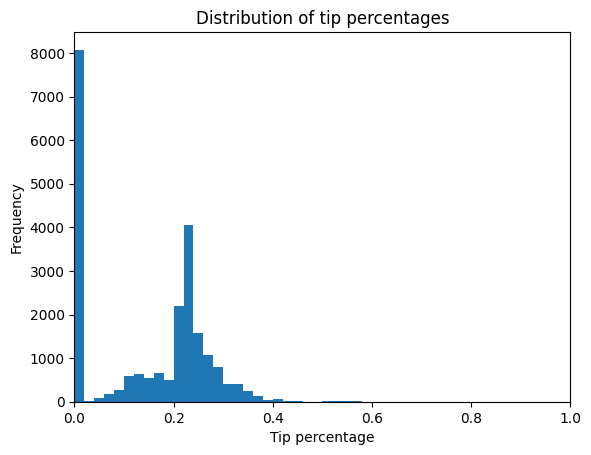

In [7]:
# prompt: Create a histogram of columns `tip_percentage` from df_temp. Set the x-axis range from 0 to 1. Set the bin size to 0.02

plt.hist(df_temp['tip_percentage'], bins=np.arange(0,1.02,0.02))
plt.xlabel('Tip percentage')
plt.ylabel('Frequency')
plt.title('Distribution of tip percentages')
plt.xlim(0,1)
plt.show()


Inspect the first few rows of `nyc_preds_means`.

In [8]:
# Inspect the first few rows of `nyc_preds_means`
### YOUR CODE HERE ###
nyc_preds_means.head()

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642


In [9]:
# EXTRA
df0.shape

(22699, 18)

In [10]:
# EXTRA
nyc_preds_means.shape

(22699, 3)

#### Join the two dataframes

Join the two dataframes using a method of your choice.

In [ ]:
# prompt: Concatenate the dataframes df0 and nyc_preds_means by adding the three columns from nyc_preds_means to df0

# Concatenate the DataFrames
#df0 = pd.concat([df0, nyc_preds_means], axis=1)

# Print some info
#df0.info()


In [11]:
# Merge datasets
### YOUR CODE HERE ###
df0 = df0.merge(nyc_preds_means,
                left_index=True,
                right_index=True)

df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,14.616667,4.435000,15.845642


<img src="https://drive.google.com/uc?id=1kpRJdR0z6z3foENI0hyMdZ9duLvXZ8Ca" width="100" height="100" align=left>

## PACE: **Analyze**

Consider the questions in your PACE Strategy Documentto reflect on the Analyze stage.

### **Task 2. Feature engineering**

You have already prepared much of this data and performed exploratory data analysis (EDA) in previous courses.

Call `info()` on the new combined dataframe.

In [12]:
#==> ENTER YOUR CODE HERE
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

You know from your EDA that customers who pay cash generally have a tip amount of $0. To meet the modeling objective, you'll need to sample the data to select only the customers who pay with credit card.

Copy `df0` and assign the result to a variable called `df1`. Then, use a Boolean mask to filter `df1` so it contains only customers who paid with credit card.

In [16]:
# prompt: Copy the dataframe df0 into a new variable called df1. Use a Boolean mask to filter df1 for rows with `payment_type` = 1.

# Copy df0 to df1
df1 = df0.copy()

# Filter df1
df1 = df1[df1['payment_type'] == 1]


In [13]:
# Subset the data to isolate only customers who paid by credit card
#==> ENTER YOUR CODE HERE
#df1 = df0[df0['payment_type']==1]

##### **Target**

Notice that there isn't a column that indicates tip percent, which is what you need to create the target variable. You'll have to engineer it.

Add a `tip_percent` column to the dataframe by performing the following calculation:  
<br/>  


$$tip\ percent = \frac{tip\ amount}{total\ amount - tip\ amount}$$  

Round the result to three places beyond the decimal. **This is an important step.** It affects how many customers are labeled as generous tippers. In fact, without performing this step, approximately 1,800 people who do tip ≥ 20% would be labeled as not generous.

To understand why, you must consider how floats work. Computers make their calculations using floating-point arithmetic (hence the word "float"). Floating-point arithmetic is a system that allows computers to express both very large numbers and very small numbers with a high degree of precision, encoded in binary. However, precision is limited by the number of bits used to represent a number, which is generally 32 or 64, depending on the capabilities of your operating system.

This comes with limitations in that sometimes calculations that should result in clean, precise values end up being encoded as very long decimals. Take, for example, the following calculation:


In [14]:
# Run this cell
1.1 + 2.2

3.3000000000000003

Notice the three that is 16 places to the right of the decimal. As a consequence, if you were to then have a step in your code that identifies values ≤ 3.3, this would not be included in the result. Therefore, whenever you perform a calculation to compute a number that is then used to make an important decision or filtration, round the number. How many degrees of precision you round to is your decision, which should be based on your use case.

Refer to this [guide for more information related to floating-point arithmetic](https://floating-point-gui.de/formats/fp/).  
Refer to this [guide for more information related to fixed-point arithmetic](https://inst.eecs.berkeley.edu/~cs61c/sp06/handout/fixedpt.html), which is an alternative to floating-point arithmetic used in certain cases.

In [17]:
# prompt: In the dataframe df1, create a new column called `tip_percent` that is calculated with the following: `tip_amount` / (`total_amount` - `tip_amount`). The result should be rounded to three decimal places.

df1['tip_percent'] = round(df1['tip_amount'] / (df1['total_amount'] - df1['tip_amount']), 3)


In [ ]:
# Create tip % col
#==> ENTER YOUR CODE HERE

Now create another column called `generous`. This will be the target variable. The column should be a binary indicator of whether or not a customer tipped ≥ 20% (0=no, 1=yes).

1. Begin by making the `generous` column a copy of the `tip_percent` column.
2. Reassign the column by converting it to Boolean (True/False).
3. Reassign the column by converting Boolean to binary (1/0).

In [ ]:
# prompt: In the dataframe df1, create a new column called `generous` where its value is set to 1 when `tip_percent` is greater or equal to 0.2, otherwise 0.

#df1['generous'] = (df1['tip_percent'] >= 0.2).astype(int)


In [18]:
# Create 'generous' col (target)
#==> ENTER YOUR CODE HERE
df1['generous'] = df1['tip_percent']
df1['generous'] = (df1['generous'] >= 0.2)
df1['generous'] = df1['generous'].astype(int)

<details>
  <summary><h5>HINT</h5></summary>

To convert from Boolean to binary, use `.astype(int)` on the column.
</details>

#### Create day column

Next, you're going to be working with the pickup and dropoff columns.

Convert the `tpep_pickup_datetime` and `tpep_dropoff_datetime` columns to datetime.

In [ ]:
# prompt: In the dataframe df1, convert the data types of `tpep_pickup_datetime` and `tpep_dropoff_datetime` to datetime.

#df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
#df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'])


In [19]:
# Convert pickup and dropoff cols to datetime
#==> ENTER YOUR CODE HERE
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

Create a `day` column that contains only the day of the week when each passenger was picked up. Then, convert the values to lowercase.

In [20]:
# prompt: In the dataframe df1, create a new column called `day` which contains the day of the week in lowercase for `tpep_pickup_datetime`.

df1['day'] = df1['tpep_pickup_datetime'].dt.day_name().str.lower()



In [ ]:
# Create a 'day' col
#==> ENTER YOUR CODE HERE


<details>
  <summary><h5>HINT</h5></summary>

To convert to day name, use `dt.day_name()` on the column.
</details>

#### Create time of day columns

Next, engineer four new columns that represent time of day bins. Each column should contain binary values (0=no, 1=yes) that indicate whether a trip began (picked up) during the following times:

`am_rush` = [06:00&ndash;10:00)  
`daytime` = [10:00&ndash;16:00)  
`pm_rush` = [16:00&ndash;20:00)  
`nighttime` = [20:00&ndash;06:00)  

To do this, first create the four columns. For now, each new column should be identical and contain the same information: the hour (only) from the `tpep_pickup_datetime` column.

In [ ]:
# prompt: In dataframe df1, create a new column called `am_rush` which is equal to 1 when the hour of `tpep_pickup_datetime` is within the times [06:00 - 10:00), where 6 is included in the range but 10 is not, otherwise 0.

#df1['am_rush'] = ((df1['tpep_pickup_datetime'].dt.hour >= 6) & (df1['tpep_pickup_datetime'].dt.hour < 10)).astype(int)


In [ ]:
# prompt: In dataframe df1, create a new column called `daytime` which is equal to 1 when the hour of `tpep_pickup_datetime` is within the times [10:00 - 16:00), where 10 is included in the range but 16 is not, otherwise 0.

#df1['daytime'] = ((df1['tpep_pickup_datetime'].dt.hour >= 10) & (df1['tpep_pickup_datetime'].dt.hour < 16)).astype(int)


In [ ]:
# prompt: In dataframe df1, create a new column called `pm_rush` which is equal to 1 when the hour of `tpep_pickup_datetime` is within the times [16:00 - 20:00), where 16 is included in the range but 20 is not, otherwise 0.

#df1['pm_rush'] = ((df1['tpep_pickup_datetime'].dt.hour >= 16) & (df1['tpep_pickup_datetime'].dt.hour < 20)).astype(int)


In [ ]:
# prompt: In dataframe df1, create a new column called `nighttime` which is equal to 1 when the hour of `tpep_pickup_datetime` is within the times [20:00 - 6:00), where 20 is included in the range but 6 is not, otherwise 0.

#df1['nighttime'] = (((df1['tpep_pickup_datetime'].dt.hour >= 20) & (df1['tpep_pickup_datetime'].dt.hour <= 23)) | ((df1['tpep_pickup_datetime'].dt.hour >= 0) & (df1['tpep_pickup_datetime'].dt.hour < 6))).astype(int)


In [ ]:
# prompt: Condense the above four code blocks into one function. Then we call this function four times for each of the four columns.

#def time_of_day(df, col_name, start_hour, end_hour):
#  df[col_name] = ((df['tpep_pickup_datetime'].dt.hour >= start_hour) & (df['tpep_pickup_datetime'].dt.hour < end_hour)).astype(int)
#  return df

#df1 = time_of_day(df1, 'am_rush', 6, 10)
#df1 = time_of_day(df1, 'daytime', 10, 16)
#df1 = time_of_day(df1, 'pm_rush', 16, 20)

#df1['nighttime'] = (((df1['tpep_pickup_datetime'].dt.hour >= 20) & (df1['tpep_pickup_datetime'].dt.hour <= 23)) | ((df1['tpep_pickup_datetime'].dt.hour >= 0) & (df1['tpep_pickup_datetime'].dt.hour < 6))).astype(int)


In [21]:
# Create 'am_rush' col
df1['am_rush'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'daytime' col
df1['daytime'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'pm_rush' col
df1['pm_rush'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'nighttime' col
df1['nighttime'] = df1['tpep_pickup_datetime'].dt.hour

You'll need to write four functions to convert each new column to binary (0/1). Begin with `am_rush`. Complete the function so if the hour is between [06:00–10:00), it returns 1, otherwise, it returns 0.

In [22]:
# Define 'am_rush()' conversion function [06:00–10:00)
    #==> ENTER YOUR CODE HERE
def am_rush(hour):
    if 6 <= hour['am_rush'] < 10:
        val = 1
    else:
        val = 0
    return val

Now, apply the `am_rush()` function to the `am_rush` series to perform the conversion. Print the first five values of the column to make sure it did what you expected it to do.

**Note:** Be careful! If you run this cell twice, the function will be reapplied and the values will all be changed to 0.

In [23]:
# Apply 'am_rush' function to the 'am_rush' series
#==> ENTER YOUR CODE HERE
df1['am_rush'] = df1.apply(am_rush, axis=1)
df1['am_rush'].head()

,am_rush
0,1
1,0
2,1
3,0
5,0


Write functions to convert the three remaining columns and apply them to their respective series.

In [24]:
# Define 'daytime()' conversion function [10:00–16:00)
#==> ENTER YOUR CODE HERE
def daytime(hour):
    if 10 <= hour['daytime'] < 16:
        val = 1
    else:
        val = 0
    return val

In [25]:
# Apply 'daytime()' function to the 'daytime' series
#==> ENTER YOUR CODE HERE
df1['daytime'] = df1.apply(daytime, axis=1)

In [26]:
# Define 'pm_rush()' conversion function [16:00–20:00)
#==> ENTER YOUR CODE HERE
def pm_rush(hour):
    if 16 <= hour['pm_rush'] < 20:
        val = 1
    else:
        val = 0
    return val

In [27]:
# Apply 'pm_rush()' function to the 'pm_rush' series
#==> ENTER YOUR CODE HERE
df1['pm_rush'] = df1.apply(pm_rush, axis=1)

In [28]:
# Define 'nighttime()' conversion function [20:00–06:00)
#==> ENTER YOUR CODE HERE
def nighttime(hour):
    if 20 <= hour['nighttime'] < 24:
        val = 1
    elif 0 <= hour['nighttime'] < 6:
        val = 1
    else:
        val = 0
    return val

In [29]:
# Apply 'nighttime' function to the 'nighttime' series
#==> ENTER YOUR CODE HERE
df1['nighttime'] = df1.apply(nighttime, axis=1)

#### Create `month` column

Now, create a `month` column that contains only the abbreviated name of the month when each passenger was picked up, then convert the result to lowercase.

<details>
  <summary><h5>HINT</h5></summary>

Refer to the [strftime cheatsheet](https://strftime.org/) for help.
</details>

In [30]:
# prompt: In dataframe df1, create a new column called `month` that contains the abbreviated name in lower case of the month for `tpep_pickup_datetime`.

df1['month'] = df1['tpep_pickup_datetime'].dt.strftime('%b').str.lower()


In [ ]:
# Create 'month' col
#==> ENTER YOUR CODE HERE

Examine the first five rows of your dataframe.

In [31]:
#==> ENTER YOUR CODE HERE
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous,day,am_rush,daytime,pm_rush,nighttime,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245,0.200,1,saturday,1,0,0,0,mar
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218,0.238,1,tuesday,0,1,0,0,apr
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706,0.199,0,friday,1,0,0,0,dec
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650,0.300,1,sunday,0,1,0,0,may
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,11.855376,2.052258,10.441351,0.200,1,saturday,0,0,0,1,mar


#### Drop columns

Drop redundant and irrelevant columns as well as those that would not be available when the model is deployed. This includes information like payment type, trip distance, tip amount, tip percentage, total amount, toll amount, etc. The target variable (`generous`) must remain in the data because it will get isolated as the `y` data for modeling.

In [32]:
# EXTRA
df1.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'mean_duration', 'mean_distance', 'predicted_fare', 'tip_percent',
       'generous', 'day', 'am_rush', 'daytime', 'pm_rush', 'nighttime',
       'month'],
      dtype='object')

In [ ]:
# prompt: In the dataframe df1, drop the columns `Unnamed: 0`, `VendorID`, and `tpep_pickup_datetime`.

#df1 = df1.drop(columns=['Unnamed: 0', 'tpep_dropoff_datetime', 'trip_distance', 'store_and_fwd_flag', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'improvement_surcharge', 'tip_amount', 'tolls_amount', 'total_amount', 'tip_percent'])


In [33]:
# Drop columns
#==> ENTER YOUR CODE HERE
#df1 = df1.drop(columns=['VendorID', 'tpep_pickup_datetime'])
drop_cols = ['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
             'payment_type', 'trip_distance', 'store_and_fwd_flag', 'payment_type',
             'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
             'improvement_surcharge', 'total_amount', 'tip_percent']

df1 = df1.drop(drop_cols, axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         15265 non-null  int64  
 1   passenger_count  15265 non-null  int64  
 2   RatecodeID       15265 non-null  int64  
 3   PULocationID     15265 non-null  int64  
 4   DOLocationID     15265 non-null  int64  
 5   mean_duration    15265 non-null  float64
 6   mean_distance    15265 non-null  float64
 7   predicted_fare   15265 non-null  float64
 8   generous         15265 non-null  int64  
 9   day              15265 non-null  object 
 10  am_rush          15265 non-null  int64  
 11  daytime          15265 non-null  int64  
 12  pm_rush          15265 non-null  int64  
 13  nighttime        15265 non-null  int64  
 14  month            15265 non-null  object 
dtypes: float64(3), int64(10), object(2)
memory usage: 1.9+ MB


In [ ]:
# EXTRA
#df1.columns

Index(['passenger_count', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'mean_duration', 'mean_distance', 'predicted_fare', 'generous', 'day',
       'am_rush', 'daytime', 'pm_rush', 'nighttime', 'month'],
      dtype='object')

#### Variable encoding

Many of the columns are categorical and will need to be dummied (converted to binary). Some of these columns are numeric, but they actually encode categorical information, such as `RatecodeID` and the pickup and dropoff locations. To make these columns recognizable to the `get_dummies()` function as categorical variables, you'll first need to convert them to `type(str)`.

1. Define a variable called `cols_to_str`, which is a list of the numeric columns that contain categorical information and must be converted to string: `RatecodeID`, `PULocationID`, `DOLocationID`.
2. Write a for loop that converts each column in `cols_to_str` to string.


In [ ]:
# prompt: In the dataframe df1, convert the following three columns to type String: `RatecodeID`, `PULocationID`, `DOLocationID`.

# 1. Define list of cols to convert to string
#cols_to_str = ['RatecodeID', 'PULocationID', 'DOLocationID']

# 2. Convert each col to string
#for col in cols_to_str:
#  df1[col] = df1[col].astype(str)


In [34]:
# 1. Define list of cols to convert to string
cols_to_str = ['RatecodeID', 'PULocationID', 'DOLocationID', 'VendorID']

# 2. Convert each column to string
for col in cols_to_str:
    df1[col] = df1[col].astype('str')


<details>
  <summary><h5>HINT</h5></summary>

To convert to string, use `astype(str)` on the column.
</details>

In [35]:
# EXTRA
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         15265 non-null  object 
 1   passenger_count  15265 non-null  int64  
 2   RatecodeID       15265 non-null  object 
 3   PULocationID     15265 non-null  object 
 4   DOLocationID     15265 non-null  object 
 5   mean_duration    15265 non-null  float64
 6   mean_distance    15265 non-null  float64
 7   predicted_fare   15265 non-null  float64
 8   generous         15265 non-null  int64  
 9   day              15265 non-null  object 
 10  am_rush          15265 non-null  int64  
 11  daytime          15265 non-null  int64  
 12  pm_rush          15265 non-null  int64  
 13  nighttime        15265 non-null  int64  
 14  month            15265 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 1.9+ MB


In [36]:
# EXTRA
df1['PULocationID'].nunique()

124

In [37]:
# EXTRA
df1['DOLocationID'].nunique()

193

Now convert all the categorical columns to binary.

1. Call `get_dummies()` on the dataframe and assign the results back to a new dataframe called `df2`.


In [38]:
# Convert categoricals to binary
#==> ENTER YOUR CODE HERE
#df2 = pd.get_dummies(df1)
df2 = pd.get_dummies(df1, drop_first=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Columns: 347 entries, passenger_count to month_sep
dtypes: bool(338), float64(3), int64(6)
memory usage: 6.1 MB


In [39]:
# EXTRA
df2.shape

(15265, 347)

##### Evaluation metric

Before modeling, you must decide on an evaluation metric.

1. Examine the class balance of your target variable.

In [40]:
# Get class balance of 'generous' col
#==> ENTER YOUR CODE HERE
df2['generous'].value_counts(normalize=True)

,proportion
generous,
1,0.526368
0,0.473632


A little over half of the customers in this dataset were "generous" (tipped ≥ 20%). The dataset is very nearly balanced.

To determine a metric, consider the cost of both kinds of model error:
* False positives (the model predicts a tip ≥ 20%, but the customer does not give one)
* False negatives (the model predicts a tip < 20%, but the customer gives more)

False positives are worse for cab drivers, because they would pick up a customer expecting a good tip and then not receive one, frustrating the driver.

False negatives are worse for customers, because a cab driver would likely pick up a different customer who was predicted to tip more&mdash;even when the original customer would have tipped generously.

**The stakes are relatively even. You want to help taxi drivers make more money, but you don't want this to anger customers. Your metric should weigh both precision and recall equally. Which metric is this?**

* F1 Score

**Exemplar response:**

F<sub>1</sub> score is the metric that places equal weight on true postives and false positives, and so therefore on precision and recall.

<img src="https://drive.google.com/uc?id=1xa68IrpTXu0KRFO49MEMiLaje8469nsk" width="100" height="100" align=left>

## PACE: **Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3. Modeling**

##### **Split the data**

Now you're ready to model. The only remaining step is to split the data into features/target variable and training/testing data.

1. Define a variable `y` that isolates the target variable (`generous`).
2. Define a variable `X` that isolates the features.
3. Split the data into training and testing sets. Put 20% of the samples into the test set, stratify the data, and set the random state.

In [ ]:
# prompt: For the dataframe df2, define a variable y that contains the column `generous` and define a variable X that contains all other columns. The split X and y into X_train, y_train, and X_test, y_test by 20% mark. Set stratify = y and set random_state to 0.

# Isolate target variable
#y = df2['generous']

# Isolate the features
#X = df2.drop(columns = 'generous')

# Split into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)


In [41]:
# Isolate target variable (y)
y = df2['generous']

# Isolate the features (X)
X = df2.drop('generous', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

##### **Random forest**

Begin with using `GridSearchCV` to tune a random forest model.

1. Instantiate the random forest classifier `rf` and set the random state.

2. Create a dictionary `cv_params` of any of the following hyperparameters and their corresponding values to tune. The more you tune, the better your model will fit the data, but the longer it will take.
 - `max_depth`  
 - `max_features`  
 - `max_samples`
 - `min_samples_leaf`  
 - `min_samples_split`
 - `n_estimators`  

3. Define a set `scoring` of scoring metrics for GridSearch to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `rf1`. Pass to it as arguments:
 - estimator=`rf`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of you cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit=_`)


**Note:** `refit` should be set to `'f1'`.<font/>
</details>



In [ ]:
#%%time
# prompt: Train a random forest classifier with X_train and y_train. Set the cv_params with the following hyperparameters and assign the usual values to them: `max_depth`, `max_features`, `max_samples`, `min_samples_leaf`, `min_samples_split`, `n_estimators`. Set scoring to precision, recall, F1 score, and accuracy. Set cv to 5 and random_state = 0. Set refit to f1.

#from sklearn.ensemble import RandomForestClassifier

# 1. Instantiate the random forest classifier
#rf = RandomForestClassifier(random_state=0)

# 2. Create a dictionary of hyperparameters to tune
#cv_params = {'max_depth': [3,5, None],
#             'max_features': [2, 3, 4],
#             'max_samples': [0.7, 1.0],
#             'min_samples_leaf': [1,2,4],
#             'min_samples_split': [2, 5, 10],
#             'n_estimators': [100, 200]
#            }

# 3. Define a set of scoring metrics
#scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
#rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1')

#rf1.fit(X_train, y_train)


In [44]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune
# Note that this example only contains 1 value for each parameter for simplicity,
# but you should assign a dictionary with ranges of values
cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1],
             'min_samples_split': [2],
             'n_estimators': [300]
             }

# 3. Define a set of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1')

Now fit the model to the training data. Note that, depending on how many options you include in your search grid and the number of cross-validation folds you select, this could take a very long time&mdash;even hours. If you use 4-fold validation and include only one possible value for each hyperparameter and grow 300 trees to full depth, it should take about 5 minutes. If you add another value for GridSearch to check for, say, `min_samples_split` (so all hyperparameters now have 1 value except for `min_samples_split`, which has 2 possibilities), it would double the time to ~10 minutes. Each additional parameter would approximately double the time.

In [45]:
#==> ENTER YOUR CODE HERE
%%time
rf1.fit(X_train, y_train)

CPU times: user 6min 8s, sys: 383 ms, total: 6min 8s
Wall time: 6min 11s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

<details>
  <summary><h5>HINT</h5></summary>

If you get a warning that a metric is 0 due to no predicted samples, think about how many features you're sampling with `max_features`. How many features are in the dataset? How many are likely predictive enough to give good predictions within the number of splits you've allowed (determined by the `max_depth` hyperparameter)? Consider increasing `max_features`.

</details>

If you want, use `pickle` to save your models and read them back in. This can be particularly helpful when performing a search over many possible hyperparameter values.

In [46]:
import pickle

# Define a path to the folder where you want to save the model
#path = '/home/jovyan/work/'

In [47]:
def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [48]:
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

In [49]:
# EXTRA
#write_pickle(path, rf1, 'rf1_exemplar')

In [50]:
# EXTRA
rf1 = read_pickle(path, 'rf1_exemplar')

Examine the best average score across all the validation folds.

In [51]:
# Examine best score
#==> ENTER YOUR CODE HERE
rf1.best_score_

0.7136009788848705

Examine the best combination of hyperparameters.

In [52]:
#==> ENTER YOUR CODE HERE
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments.

<details>
  <summary><h5>HINT</h5></summary>

To learn more about how this function accesses the cross-validation results, refer to the [`GridSearchCV` scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV) for the `cv_results_` attribute.

</details>

In [53]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

Call `make_results()` on the GridSearch object.

In [54]:
#==> ENTER YOUR CODE HERE
#results = make_results('Random Forest', rf1, 'f1')
results = make_results('RF CV', rf1, 'f1')
results

,model,precision,recall,F1,accuracy
0,RF CV,0.674919,0.757312,0.713601,0.680233


Your results should produce an acceptable model across the board. Typically scores of 0.65 or better are considered acceptable, but this is always dependent on your use case. Optional: try to improve the scores. It's worth trying, especially to practice searching over different hyperparameters.

<details>
  <summary><h5>HINT</h5></summary>

For example, if the available values for `min_samples_split` were [2, 3, 4] and GridSearch identified the best value as 4, consider trying [4, 5, 6] this time.
</details>

Use your model to predict on the test data. Assign the results to a variable called `rf_preds`.

<details>
  <summary><h5>HINT</h5></summary>
    
You cannot call `predict()` on the GridSearchCV object directly. You must call it on the `best_estimator_`.
</details>

For this project, you will use several models to predict on the test data. Remember that this decision comes with a trade-off. What is the benefit of this? What is the drawback?

* The method of training and cross-validating models using training data, then scored on the test data, mitigates the risk of overfitting the model to the training data.
* This is a very common approach, but it does not score the champion model on completely new data, so expected future performance may be optimistic.

**Exemplar response:**

The benefit of using multiple models to predict on the test data is that you can compare models using data that was not used to train/tune hyperparameters. This reduces the risk of selecting a model based on how well it fit the training data.

The drawback of using the final test data to select a model is that, by using the unseen data to make a decision about which model to use, you no longer have a truly unbiased idea of how your model would be expected to perform on new data. In this case, think of final model selection as another way of "tuning" your model.

In [55]:
# Get scores on test data
#==> ENTER YOUR CODE HERE
rf_preds = rf1.best_estimator_.predict(X_test)

Use the below `get_test_scores()` function you will use to output the scores of the model on the test data.

In [56]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `rf_test_scores`.
2. Call `rf_test_scores` to output the results.

###### RF test results

In [57]:
 # Get scores on test data
#==> ENTER YOUR CODE HERE
#rf_test_scores = get_test_scores('Random Forest', rf_preds, y_test)
#rf_test_scores
rf_test_scores = get_test_scores('RF test', rf_preds, y_test)
results = pd.concat([results, rf_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.674919,0.757312,0.713601,0.680233
0,RF test,0.675297,0.779091,0.723490,0.686538


**Question:** How do your test results compare to your validation results?

* The metrics of the test results have smaller values that the metrics of the validation results.
  * validation results: precision = 0.526596, recall = 0.999533, F1 = 0.689785, accuracy = 0.526777
  * test results: precision = 0.526575, recall = 0.998755, F1 = 0.689581, accuracy = 0.526695

**Exemplar response:**

All scores increased by at most ~0.02.

##### **XGBoost**

 Try to improve your scores using an XGBoost model.

1. Instantiate the XGBoost classifier `xgb` and set `objective='binary:logistic'`. Also set the random state.

2. Create a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune:
 - `max_depth`
 - `min_child_weight`
 - `learning_rate`
 - `n_estimators`

3. Define a set `scoring` of scoring metrics for grid search to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `xgb1`. Pass to it as arguments:
 - estimator=`xgb`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit='f1'`)

In [ ]:
# prompt: Train an XGBoost classifier with X_train and y_train. Set the cv_params with the following hyperparameters and assign the usual values to them: `max_depth`, `min_child_weight`, `learning_rate`, `n_estimators`. Set scoring to precision, recall, F1 score, and accuracy. Set cv to 5 and random_state = 0. Set refit to f1.

#%%time

# 1. Instantiate the XGBoost classifier
#xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# 2. Create a dictionary of hyperparameters to tune
#cv_params = {'max_depth': [4, 6, 8],
#             'min_child_weight': [1, 3, 5],
#             'learning_rate': [0.1, 0.2, 0.3],
#             'n_estimators': [100, 150, 200],
#             'subsample': [0.7],
#             'colsample_bytree': [0.7]
#            }

# 3. Define a set of scoring metrics
#scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
#xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1', verbose=1)

#xgb1.fit(X_train, y_train)


In [58]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# 2. Create a dictionary of hyperparameters to tune
# Note that this example only contains 1 value for each parameter for simplicity,
# but you should assign a dictionary with ranges of values
cv_params = {'learning_rate': [0.1],
             'max_depth': [8],
             'min_child_weight': [2],
             'n_estimators': [500]
             }

# 3. Define a set of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1')

Now fit the model to the `X_train` and `y_train` data.

In [59]:
%%time
#==> ENTER YOUR CODE HERE
xgb1.fit(X_train, y_train)

CPU times: user 52.9 s, sys: 286 ms, total: 53.2 s
Wall time: 37.1 s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [8],
                         'min_child_weight': [2], 'n_estimators': [500]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [60]:
# EXTRA
#write_pickle(path, xgb1, 'xgb1_exemplar')

In [61]:
# EXTRA
xgb1 = read_pickle(path, 'xgb1_exemplar')

Get the best score from this model.

In [62]:
# Examine best score
#==> ENTER YOUR CODE HERE
xgb1.best_score_

0.6955124635485908

And the best parameters.

In [63]:
# Examine best parameters
#==> ENTER YOUR CODE HERE
xgb1.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 2,
 'n_estimators': 500}

##### XGB CV Results

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments.

In [64]:
# Call 'make_results()' on the GridSearch object
#==> ENTER YOUR CODE HERE
#results_xgb = make_results('XGBoost', xgb1, 'f1')
#results_xgb
xgb1_cv_results = make_results('XGB CV', xgb1, 'f1')
results = pd.concat([results, xgb1_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.674919,0.757312,0.713601,0.680233
0,RF test,0.675297,0.779091,0.723490,0.686538
0,XGB CV,0.669726,0.723553,0.695512,0.666557


Use your model to predict on the test data. Assign the results to a variable called `xgb_preds`.

<details>
  <summary><h5>HINT</h5></summary>
    
You cannot call `predict()` on the GridSearchCV object directly. You must call it on the `best_estimator_`.
</details>

In [65]:
# Get scores on test data
#==> ENTER YOUR CODE HERE
xgb_preds = xgb1.best_estimator_.predict(X_test)

###### XGB test results

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `xgb_test_scores`.
2. Call `xgb_test_scores` to output the results.

In [66]:
# Get scores on test data
#==> ENTER YOUR CODE HERE
#xgb_test_scores = get_test_scores('XGBoost', xgb_preds, y_test)
#xgb_test_scores
xgb_test_scores = get_test_scores('XGB test', xgb_preds, y_test)
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.674919,0.757312,0.713601,0.680233
0,RF test,0.675297,0.779091,0.723490,0.686538
0,XGB CV,0.669726,0.723553,0.695512,0.666557
0,XGB test,0.677219,0.745488,0.709716,0.679004


**Question:** Compare these scores to the random forest test scores. What do you notice? Which model would you choose?

* Random forest test results: precision = 0.526575, recall = 0.998755, F1 = 0.689581, accuracy = 0.526695
* XGBoost test results: precision = 0.584438, recall = 0.630989, F1 = 0.606822, accuracy = 0.569604
* Random forest has a higher recall value and F1 score than XGBoost, but XGBoost has higher precision and accuracy than random forest.

**Exemplar response:**

The F<sub>1</sub> score is ~0.01 lower than the random forest model. Both models are acceptable, but the random forest model is the champion.

Plot a confusion matrix of the model's predictions on the test data.

In [ ]:
# prompt: For xgb1, compute a confusion matrix between xgb_preds and y_test, then display the matrix with values_format = ''. Do the same thing for rf1 between rf_preds and y_test.

#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix for xgb1
#cm_xgb = confusion_matrix(y_test, xgb_preds)

# Display confusion matrix for xgb1
#disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb1.classes_)
#disp_xgb.plot(values_format='')
#plt.title('XGBoost Confusion Matrix')
#plt.show()

# Compute confusion matrix for rf1
#cm_rf = confusion_matrix(y_test, rf_preds)

# Display confusion matrix for rf1
#disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf1.classes_)
#disp_rf.plot(values_format='')
#plt.title('Random Forest Confusion Matrix')
#plt.show()


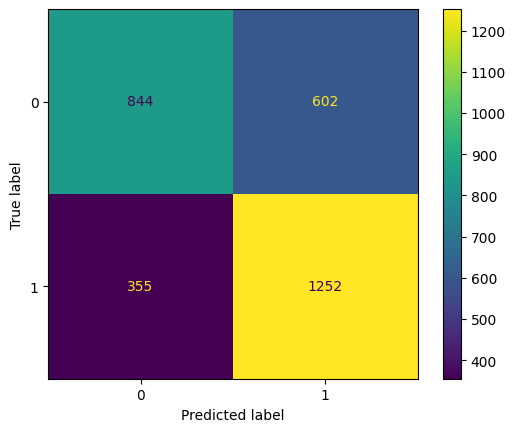

In [67]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, rf_preds, labels=rf1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf1.classes_,
                             )
disp.plot(values_format='');

**Question:** What type of errors are more common for your model?

* Random forest has more Type I (false positive) errors than Type II (false negative) errors.
* XGBoost has similar Type I and Type II errors, but Type I errors is greater.
* There are more Type I errors in Random forest than in XGBoost.

**Exemplar response:**

The model is almost twice as likely to predict a false positive than it is to predict a false negative. Therefore, type I errors are more common. This is less desirable, because it's better for a driver to be pleasantly surprised by a generous tip when they weren't expecting one than to be disappointed by a low tip when they were expecting a generous one. However, the overall performance of this model is satisfactory.

##### Feature importance

Use the `feature_importances_` attribute of the best estimator object to inspect the features of your final model. You can then sort them and plot the most important ones.

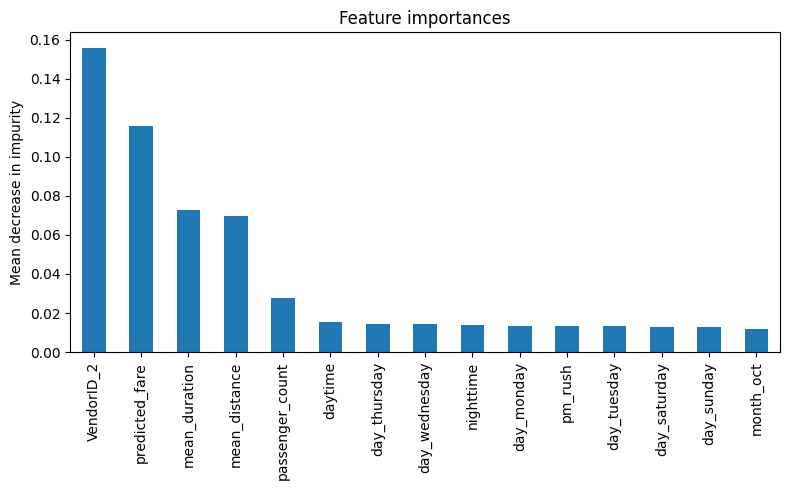

In [68]:
#==> ENTER YOUR CODE HERE
#plot_importance(xgb1.best_estimator_);
importances = rf1.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)
rf_importances = rf_importances.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(8,5))
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();

<img src="https://drive.google.com/uc?id=1O04Ts47cyQs_UPSPtJxUXGEKsSpteLRL" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 4. Conclusion**

In this step, use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**  
* If the random forest model is used, the driver must be aware that 50% of the customers predicted to give generous tips might not actually give generous tips.
* If the XGBoost model is used, the driver must be aware that 40% of the customers predicted to give generous tips might not actually give generous tips.

**Exemplar response:**

Yes, this is model performs acceptably. Its F<sub>1</sub> score was 0.7235 and it had an overall accuracy of 0.6865. It correctly identified ~78% of the actual responders in the test set, which is 48% better than a random guess. It may be worthwhile to test the model with a select group of taxi drivers to get feedback.  

2. **What was your model doing? Can you explain how it was making predictions?**   
* For the random forest model:
    * 200 decision trees were created for the ensemble (n_estimators: 200).
    * Each tree randomly selected 3 features (max_features: 3) and is trained with the entire training set (max_samples: 1.0).
    * Each tree can grow until leaves are pure or until all leaves contain less than 2 samples (max_depth: None, min_samples_split: 2).
    * The splits in each tree can only occur if the resulting nodes have a minimum of 4 observations (min_samples_leaf: 4).
* For the XGBoost model:
    * 200 decision trees were created for the ensemble (n_estimators: 200).
    * Each tree can only grow up to 4 levels (max_depth: 4).
    * The splits in each tree can only occur if the resulting child nodes have a minimum weight, or number of observations, of 5 (min_child_weight: 5).
    * The model gives each decision tree’s prediction a weight of 20% in the ensemble’s final prediction (learning_rate: 0.2).
    * Each tree randomly selects 70% of the features during training (colsample_bytree: 0.7).
    * Each tree samples 70% of the training set during training (subsample: 0.7).

**Exemplar response:**

Unfortunately, random forest is not the most transparent machine learning algorithm. We know that `VendorID`, `predicted_fare`, `mean_duration`, and `mean_distance` are the most important features, but we don't know how they influence tipping. This would require further exploration. It is interesting that `VendorID` is the most predictive feature. This seems to indicate that one of the two vendors tends to attract more generous customers. It may be worth performing statistical tests on the different vendors to examine this further.

3. **Are there new features that you can engineer that might improve model performance?**   
* The features that were chosen are sufficient for the models.

**Exemplar response:**

There are almost always additional features that can be engineered, but hopefully the most obvious ones were generated during the first round of modeling. In our case, we could try creating three new columns that indicate if the trip distance is short, medium, or far. We could also engineer a column that gives a ratio that represents (the amount of money from the fare amount to the nearest higher multiple of \\$5) / fare amount. For example, if the fare were \\$12, the value in this column would be 0.25, because \\$12 to the nearest higher multiple of \\$5 (\\$15) is \\$3, and \\$3 divided by \\$12 is 0.25. The intuition for this feature is that people might be likely to simply round up their tip, so journeys with fares with values just under a multiple of \\$5 may have lower tip percentages than those with fare values just over a multiple of \\$5. We could also do the same thing for fares to the nearest \\$10.

$$
round5\_ratio = \frac{amount\ of\ money\ from\ the\ fare\ amount\ to\ the\ nearest\ higher\ multiple\ of\ \$5}{fare\ amount}
$$

<br>

<details>
    <summary><h5>HINT</h5></summary>
    $$ = \frac{5 - (fare\ mod\ 5)}{fare\ amount}$$
</details>

<br>

4. **What features would you want to have that would likely improve the performance of your model?**   
* The features that were chosen are sufficient for the models.

**Exemplar response:**

It would probably be very helpful to have past tipping behavior for each customer. It would also be valuable to have accurate tip values for customers who pay with cash.
It would be helpful to have a lot more data. With enough data, we could create a unique feature for each pickup/dropoff combination.

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion. Even if you cannot use the model to make strong predictions, was the work done in vain? Consider any insights that you could report back to stakeholders.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.